In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Dane treningowe: [masa, średnica]
X_train = np.array([
    [130.0, 7.0],   # jabłko
    [150.0, 8.0],   # jabłko
    [180.0, 8.5],   # jabłko
    [90.0, 6.0],    # pomarańcza
    [100.0, 6.5],   # pomarańcza
    [110.0, 7.0],   # pomarańcza
    [131.0, 7.3],   # jabłko
    [152.0, 8.1],   # jabłko
    [179.0, 8.3],   # jabłko
    [92.0, 6.1],    # pomarańcza
    [101.0, 6.5],   # pomarańcza
    [111.0, 7.0],   # pomarańcza
], dtype=float)

# Etykiety: jabłko = 1, pomarańcza = 0
y_train = np.array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int)

# Dane testowe
X_test = np.array([
    [145.0, 9.5],   # jabłko
    [155.0, 8.5],   # jabłko
    [185.0, 8.2],   # jabłko
    [85.0, 7.0],    # pomarańcza
    [101.0, 6.1],   # pomarańcza
    [110.0, 8.0],   # pomarańcza
], dtype=float)

y_test = np.array([1, 1, 1, 0, 0, 0], dtype=int)

In [3]:
def threshold_function(x: np.array, threshold: int = 0) -> np.array:
    return np.where(x >= threshold, 1, 0)


In [16]:
class Perceptron:

    def __init__(self, acitvation_func=threshold_function, epochs=100, learning_rate=0.01):
        self.activation_func = acitvation_func
        self.weights = None
        self.bias = 0
        self.epochs = epochs
        self.lr = learning_rate

    def fit(self, features, labels):
        n_samples, n_features = features.shape
        self.weights = np.zeros(n_features)
        y = np.array(labels)

        for _ in range(self.epochs):
            for i, x_i in enumerate(features):
                y_predicted = self.predict(x_i)
                update = self.lr * (y[i] - y_predicted) 

                self.weights += update * x_i
                self.bias += update

    def _linear_output(self, features):
        return features @ self.weights + self.bias

    def predict(self, features: np.array) -> np.array:
        linear_output = self._linear_output(features)
        y_predicted = self.activation_func(linear_output)
        return y_predicted

In [14]:
model = Perceptron()

model.fit(X_train, y_train)


In [17]:
preds = model.predict(X_test)

In [18]:
def confusion_counts(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    TP = int(((y_true == 1) & (y_pred == 1)).sum())
    FP = int(((y_true == 0) & (y_pred == 1)).sum())
    TN = int(((y_true == 0) & (y_pred == 0)).sum())
    FN = int(((y_true == 1) & (y_pred == 0)).sum())
    return TP, FP, TN, FN

def metrics_one(y_true, y_pred):
    TP, FP, TN, FN = confusion_counts(y_true, y_pred)
    total = TP + FP + TN + FN
    acc = (TP + TN) / total if total else np.nan
    prec = TP / (TP + FP) if (TP + FP) else 0.0
    rec = TP / (TP + FN) if (TP + FN) else 0.0
    f1 = 2 * prec * rec / (prec + rec) if (prec + rec) else 0.0

    tpr = rec
    fpr = FP / (FP + TN) if (FP + TN) else 0.0
    return TP, FP, TN, FN, acc, prec, rec, f1, tpr, fpr

def metrics_dict(y_true, y_pred):
    TP, FP, TN, FN, acc, prec, rec, f1, tpr, fpr = metrics_one(y_true, y_pred)

    return {
        "TP": TP, "FP": FP, "TN": TN, "FN": FN,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "TPR": tpr,
        "FPR": fpr
    }

metrics_dict(y_test, preds)

{'TP': 2,
 'FP': 0,
 'TN': 3,
 'FN': 1,
 'accuracy': 0.8333333333333334,
 'precision': 1.0,
 'recall': 0.6666666666666666,
 'f1': 0.8,
 'TPR': 0.6666666666666666,
 'FPR': 0.0}

In [19]:
def make_meshgrid(X, n_points=200, margin=2):

    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, n_points),
        np.linspace(y_min, y_max, n_points),
    )

    return xx, yy

In [26]:
xx, yy = make_meshgrid(X_test)

In [24]:
def predict_on_mesh(model, xx, yy):
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    return Z.reshape(xx.shape)

In [27]:
predict_on_mesh(model, xx, yy)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
def plot_decision_bounduary(X, y, model):
    xx, yy  = make_meshgrid(X)
    Z = predict_on_mesh(model, xx, yy)
    y_pred = model.predict(X)

    plt.contourf(xx, yy, Z)

    # predykcje
    plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s=100)
    plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s=100)

    # rzeczywiste etykiety
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker="+")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker="+")


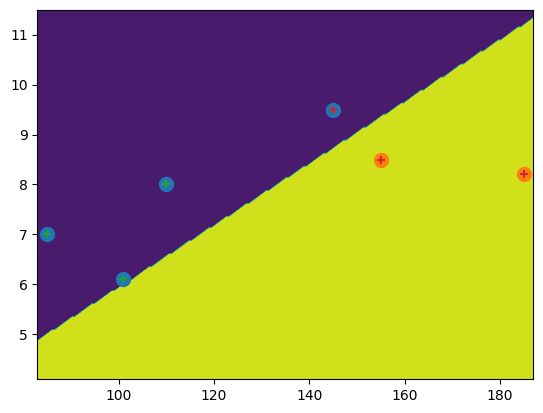

In [42]:
plot_decision_bounduary(X_test, y_test, model)

In [43]:
X_train_scaled = X_train / X_train.max()
X_test_scaled = X_test / X_train.max()

In [44]:
X_test_scaled

array([[0.80555556, 0.05277778],
       [0.86111111, 0.04722222],
       [1.02777778, 0.04555556],
       [0.47222222, 0.03888889],
       [0.56111111, 0.03388889],
       [0.61111111, 0.04444444]])

In [45]:
model = Perceptron()
model.fit(X_train_scaled, y_train)

In [47]:
preds = model.predict(X_test_scaled)

In [48]:
preds

array([1, 1, 1, 0, 0, 0])

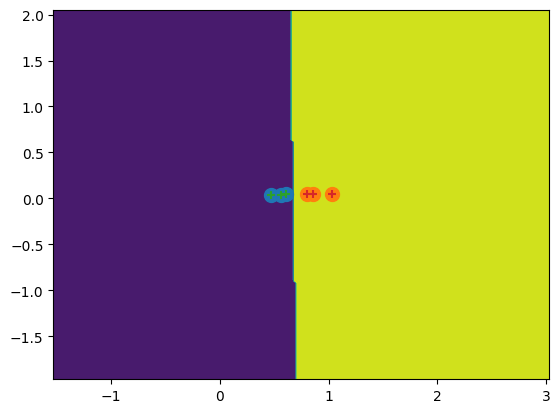

In [49]:
plot_decision_bounduary(X_test_scaled, y_test, model)